In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

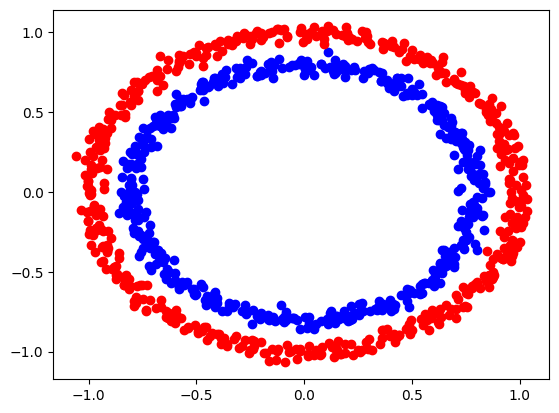

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
x, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)
circles = pd.DataFrame({"X0":x[:, 0], "X1":x[:, 1], "label":y})

#show only dots with y=0 and y=1 in different colors
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')

In [4]:
x_train, y_train, x_test, y_test = x[:800], y[:800], x[800:], y[800:]

In [5]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7007 - binary_accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6956 - binary_accuracy: 0.5113
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6927 - binary_accuracy: 0.5163
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6853 - binary_accuracy: 0.5625
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6818 - binary_accuracy: 0.5650
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6632 - binary_accuracy: 0.5788
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6302 - binary_accuracy: 0.6800
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5882 - binary_accuracy: 0.7287
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5465 - binary_accuracy: 0.7425
Epoch 10/100
25/25 [==========================

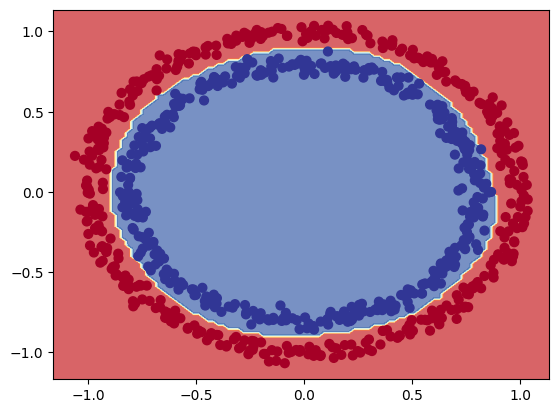

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(14, input_shape=(None, 2)),
  tf.keras.layers.Dense(14, activation=ks.activations.tanh),
  tf.keras.layers.Dense(14, activation=ks.activations.tanh),
  tf.keras.layers.Dense(1, activation=ks.activations.sigmoid)
])

# Compile the model with the ideal learning rate
model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=[ks.metrics.binary_accuracy])

# Fit the model for 20 epochs (5 less than before)
history = model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test, y_test)
plot_decision_boundary(model, x_train, y_train)

In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0038 - binary_accuracy: 1.0000
Model loss on test set: 0.003755903569981456
Model accuracy on test set: 100.00%
